# Generate Embeddings

This notebook generates embeddings for all entries using OpenAI's text-embedding-3-large model.


In [1]:
import json
import numpy as np
import sys
from pathlib import Path

# Add src to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

from embeddings import generate_embeddings_for_dataset

# Set up paths
data_path = project_root / "data" / "processed" / "cleaned_data.json"
embeddings_path = project_root / "data" / "processed" / "embeddings.npy"

print(f"Loading cleaned data from: {data_path}")
print(f"Embeddings will be saved to: {embeddings_path}")


Loading cleaned data from: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/cleaned_data.json
Embeddings will be saved to: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/embeddings.npy


In [2]:
# Load cleaned data
with open(data_path, 'r') as f:
    cleaned_data = json.load(f)

print(f"Loaded {len(cleaned_data)} entries")
print(f"\nExample embedding text:")
print(cleaned_data[0]['embedding_text'])


Loaded 18 entries

Example embedding text:
Khyathi Komalan. works on Category Theory Research. : Research applying category theory to domains ranging from quantum physics to social relationships.. Domains: mathematics, category theory, theoretical physics, complex systems, social modeling. Category: research.


In [3]:
# Generate embeddings
embeddings = generate_embeddings_for_dataset(
    cleaned_data,
    embeddings_path,
    text_field="embedding_text",
    model="text-embedding-3-large"
)


Generating embeddings for 18 entries using text-embedding-3-large...
Processed batch 1 / 1

Embedding shape: (18, 3072)
Embedding dimension: 3072
Saved embeddings to: /Users/kevinmcpherson/github-projects/emergent-ventures-semantic-map/data/processed/embeddings.npy


In [4]:
# Verify embeddings
print(f"Embeddings shape: {embeddings.shape}")
print(f"Number of entries: {len(cleaned_data)}")
print(f"Embedding dimension: {embeddings.shape[1]}")
print(f"\nEmbedding statistics:")
print(f"  Mean: {embeddings.mean():.4f}")
print(f"  Std: {embeddings.std():.4f}")
print(f"  Min: {embeddings.min():.4f}")
print(f"  Max: {embeddings.max():.4f}")


Embeddings shape: (18, 3072)
Number of entries: 18
Embedding dimension: 3072

Embedding statistics:
  Mean: -0.0000
  Std: 0.0180
  Min: -0.1018
  Max: 0.1100


Generating 2D t-SNE visualization...


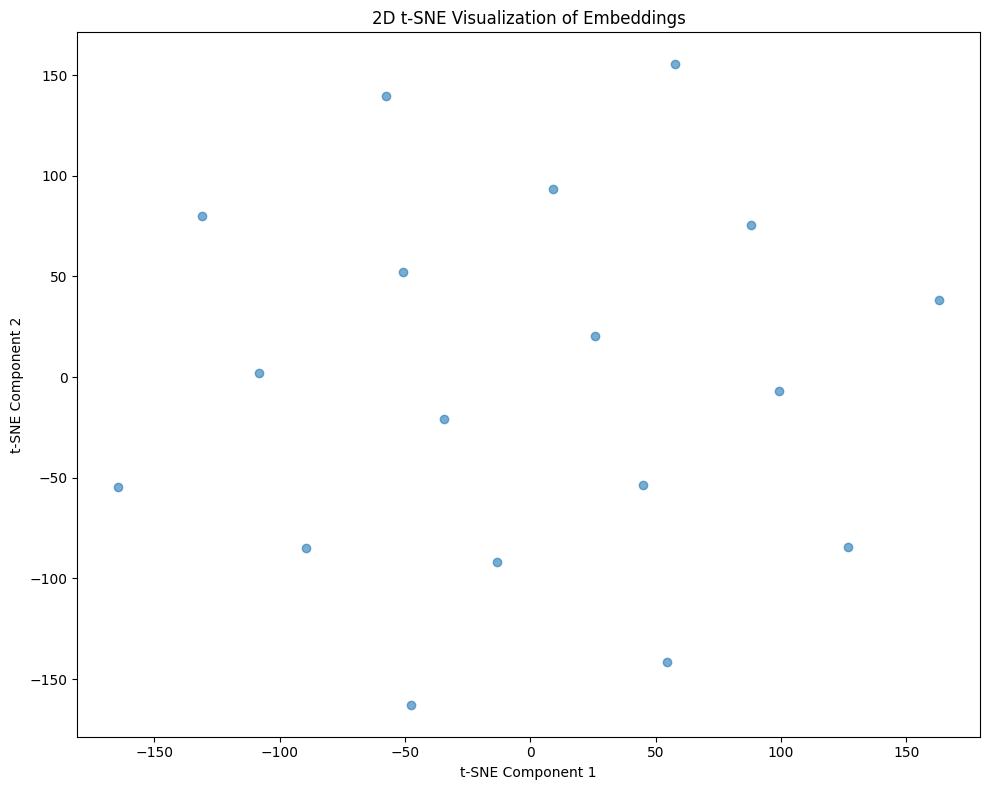

Note: This is just a preview. UMAP will be used for clustering.


In [5]:
# Optional: Quick visualization with t-SNE (2D preview)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

print("Generating 2D t-SNE visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings) - 1))
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6)
plt.title("2D t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.tight_layout()
plt.show()

print("Note: This is just a preview. UMAP will be used for clustering.")
